In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [13]:
df_location = pd.read_csv('C:/data/cctv_location.csv',encoding='cp949')
df_location.head()

,무인교통단속카메라관리번호,도로노선명,소재지도로명주소,소재지지번주소,Unnamed: 4,경도,위도,설치장소,관리기관명,데이터기준일자
0,덕진-1,권삼득로,전라북도 전주시 덕진구 권삼득로 309,전라북도 전주시 덕진구 금암동 664-43,NaN,127.128024,35.843512,전북대구정문(실내체육관),전라북도 전주시청,2022-06-15
1,덕진-2,가리내로,전라북도 전주시 덕진구 가리내로 15,전라북도 전주시 덕진구 금암동 457-25,NaN,127.134489,35.834180,금암휴엔하임입구(터미널옆),전라북도 전주시청,2022-06-15
2,덕진-3,가리내로,전라북도 전주시 덕진구 가리내로 31,전라북도 전주시 덕진구 금암동 706-6,NaN,127.132680,35.833994,시외버스터미널,전라북도 전주시청,2022-06-15
3,덕진-4,기린대로,전라북도 전주시 덕진구 기린대로 450,전라북도 전주시 덕진구 금암동 708-15,NaN,127.128051,35.840947,종합경기장 앞(일양병원),전라북도 전주시청,2022-06-15
4,덕진-5,저경단로,전라북도 전주시 덕진구 조경단로 103,전라북도 전주시 덕진구 금암동 1546-9,NaN,127.138522,35.843395,허병원 앞(사대부고사거리),전라북도 전주시청,2022-06-15


In [14]:
df_location.shape

(356, 10)

In [15]:
df_location.head()

,무인교통단속카메라관리번호,도로노선명,소재지도로명주소,소재지지번주소,Unnamed: 4,경도,위도,설치장소,관리기관명,데이터기준일자
0,덕진-1,권삼득로,전라북도 전주시 덕진구 권삼득로 309,전라북도 전주시 덕진구 금암동 664-43,NaN,127.128024,35.843512,전북대구정문(실내체육관),전라북도 전주시청,2022-06-15
1,덕진-2,가리내로,전라북도 전주시 덕진구 가리내로 15,전라북도 전주시 덕진구 금암동 457-25,NaN,127.134489,35.834180,금암휴엔하임입구(터미널옆),전라북도 전주시청,2022-06-15
2,덕진-3,가리내로,전라북도 전주시 덕진구 가리내로 31,전라북도 전주시 덕진구 금암동 706-6,NaN,127.132680,35.833994,시외버스터미널,전라북도 전주시청,2022-06-15
3,덕진-4,기린대로,전라북도 전주시 덕진구 기린대로 450,전라북도 전주시 덕진구 금암동 708-15,NaN,127.128051,35.840947,종합경기장 앞(일양병원),전라북도 전주시청,2022-06-15
4,덕진-5,저경단로,전라북도 전주시 덕진구 조경단로 103,전라북도 전주시 덕진구 금암동 1546-9,NaN,127.138522,35.843395,허병원 앞(사대부고사거리),전라북도 전주시청,2022-06-15


In [16]:
df_location.describe()

,Unnamed: 4,경도,위도
count,0.0,356.000000,356.000000
mean,NaN,127.121932,35.830365
std,NaN,0.025201,0.023675
min,NaN,127.055986,35.775550
25%,NaN,127.108196,35.815003
50%,NaN,127.124520,35.828526
75%,NaN,127.141913,35.844496
max,NaN,127.175655,35.881241


In [17]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   무인교통단속카메라관리번호  356 non-null    object 
 1   도로노선명          356 non-null    object 
 2   소재지도로명주소       308 non-null    object 
 3   소재지지번주소        356 non-null    object 
 4   Unnamed: 4     0 non-null      float64
 5   경도             356 non-null    float64
 6   위도             356 non-null    float64
 7   설치장소           356 non-null    object 
 8   관리기관명          356 non-null    object 
 9   데이터기준일자        356 non-null    object 
dtypes: float64(3), object(7)
memory usage: 27.9+ KB


<AxesSubplot:xlabel='경도', ylabel='위도'>

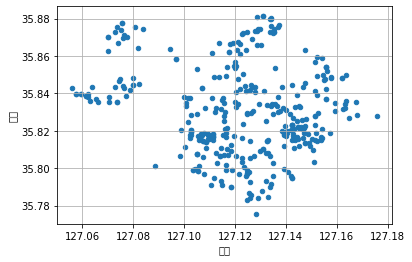

In [18]:
df_location[:10000].plot.scatter(x='경도',y='위도',grid=True)

In [19]:
import folium

In [23]:
geo_df = df_location.copy()

map =folium.Map(location=(geo_df['위도'].mean(),geo_df['경도'].mean()),zoom_start =12)

for n in geo_df.index: 
    popup_name = geo_df.loc[n,'설치장소']
    if geo_df['설치장소'][n]:
        icon_color = 'black'
    folium.Marker([geo_df.loc[n,'위도'],geo_df.loc[n,'경도']],
                popup=popup_name,
                icon=folium.Icon(color=icon_color)).add_to(map)
map